In [90]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
#stop_eng = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

from subprocess import check_output
'''
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
'''
import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
#vect = CountVectorizer(stop_words='english')
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#print(check_output(["ls", "/Users/yenlinh/Documents/Tinhte/text_classification"]).decode("utf8"))


In [91]:
stop_eng = set(stopwords.words('english'))
stop_eng

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [92]:
#comment_raw = pd.read_csv("/Users/yenlinh/Documents/Tinhte/text_classification/dataset_1.csv",usecols=['post_id','label','message','is_question'],encoding='utf-8')
comment_raw = pd.read_csv("/Users/yenlinh/Documents/Tinhte/text_classification/datatrain_1.csv",usecols=['post_id','message','is_question'],encoding='utf-8')
comment_raw= comment_raw.dropna(subset=['message'])
comment_raw.head()

,post_id,message,is_question
0,52135495.0,"Chào bạn,\nMình cũngcó sử dụng Yandex để tạo m...",1
1,52136050.0,Pin còn One Power 5k thì quá ngon nhưng xem xé...,0
2,52136333.0,Vào giúp mình với.mình xài con 6s qt ios 11.0....,1
3,52136445.0,Như tiêu đề hiện tại do em làm giáo dục phải n...,1
4,52136817.0,"Mọi người ơi cho em hỏi, hôm qua thấy bị lỗi u...",1


In [93]:
comment_raw['is_question'].value_counts()
#comment_raw['is_question'].nunique()
# TOTAL = 2618 comments

0    1630
1     988
Name: is_question, dtype: int64

In [94]:
comment_raw.info()
comment_raw.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2618
Data columns (total 3 columns):
post_id        2618 non-null float64
message        2618 non-null object
is_question    2618 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 81.8+ KB


,post_id,is_question
count,2.618000e+03,2618.000000
mean,5.206936e+07,0.377387
std,2.544539e+05,0.484826
min,5.159131e+07,0.000000
25%,5.177332e+07,0.000000
50%,5.220086e+07,0.000000
75%,5.229262e+07,1.000000
max,5.229327e+07,1.000000


In [95]:
comment_raw.nunique()
comment_raw.shape # (2618, 3)

(2618, 3)

In [96]:
vn_stop = [line.strip() for line in open("/Users/yenlinh/Documents/Tinhte/text_classification/vietnamese.txt")]
vn_stop

['URL',
 'HTTP',
 'HTTPS',
 'JPG',
 'IMG',
 'a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược'

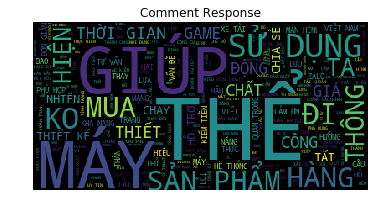

In [97]:
def cloud(text):
    wordcloud = WordCloud(background_color="black",stopwords=vn_stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Comment Response")
cloud(comment_raw['message'])

In [98]:
####  Naive Bayes
x = comment_raw.message
y = comment_raw.is_question
y_train = y
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

vect = CountVectorizer(stop_words=vn_stop)
#x_train_dtm = vect.fit_transform(x_train)
x_train_dtm = vect.fit_transform(x)
# Lưu lại vect ở chỗ này, vì fit là hàm form content cho caí vec, khi mới khởi tạo đứa nào cũng giống nhau
# khi fit xong thì nó sẽ khác, ví dụ dictionary của vect
import pickle
with open('vect.pickle', 'wb') as handle:
    pickle.dump(vect, handle, protocol=pickle.HIGHEST_PROTOCOL)

x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
# Lưu lại vect ở chỗ này, vì fit là hàm form content cho caí vec, khi mới khởi tạo đứa nào cũng giống nhau
# khi fit xong thì nó sẽ khác, ví dụ dictionary của vect
with open('NB.pickle', 'wb') as handle:
    pickle.dump(NB, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.799618320610687

In [65]:
x.head()

0    Chào bạn,\nMình cũngcó sử dụng Yandex để tạo m...
1    Pin còn One Power 5k thì quá ngon nhưng xem xé...
2    Vào giúp mình với.mình xài con 6s qt ios 11.0....
3    Như tiêu đề hiện tại do em làm giáo dục phải n...
4    Mọi người ơi cho em hỏi, hôm qua thấy bị lỗi u...
Name: message, dtype: object

In [66]:
####  Naive Bayes
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_predict)))
print('Precision score: {}'.format(precision_score(y_test, y_predict)))
print('Recall score: {}'.format(recall_score(y_test, y_predict)))
print('F1 score: {}'.format(f1_score(y_test, y_predict)))

Accuracy score: 0.7595419847328244
Precision score: 0.639344262295082
Recall score: 0.8041237113402062
F1 score: 0.7123287671232877


In [67]:
#Random Forest
#rf = RandomForestClassifier(max_depth=10,max_features=10)
rf = RandomForestClassifier()
rf.fit(x_train_dtm,y_train)
with open('rf.pickle', 'wb') as handle:
    pickle.dump(rf, handle, protocol=pickle.HIGHEST_PROTOCOL)

rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.8091603053435115

In [ ]:
### SVM classification
from sklearn.linear_model import SGDClassifier
random_state=42,max_iter=5, tol=None)
svm = SGDClassifier()
svm.fit(x_train_dtm,y_train)
with open('svm.pickle', 'wb') as handle:
    pickle.dump(svm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [68]:
### Exlpore which comment wrong_predicted
x_test_2 = pd.DataFrame(x_test).reset_index()
y_test_2 = pd.DataFrame(y_test).reset_index()
y_test_2 = pd.DataFrame(y_test_2['is_question'])
y_predict_2 = pd.DataFrame(y_predict)
y_predict_2.rename(columns={0:'lable_prediction'}, inplace = True)
x_y_pre= pd.concat([x_test_2,y_test_2,y_predict_2], axis=1, sort=False)
x_y_pre.head()

,index,message,is_question,lable_prediction
0,1688,Các anh/ chị lão làng xin cho em hỏi chút ạ:\n...,1,0
1,1849,Các bác cho em hỏi :\nMàn hình S2318H có bị ám...,1,0
2,2361,Bạn mail giúp mình nhé. Mail: hoangphamrider@...,1,1
3,2532,Giới thiệu xe tải HD N250 Thùng Kín \nHyund...,0,0
4,2228,Mình thích Microsoft nhất vì ít ra nó cũng giú...,0,0


In [69]:
x_y_pre['predict_true']= np.where(x_y_pre['is_question']==x_y_pre['lable_prediction'], 'yes', 'no')
x_y_pre[x_y_pre.predict_true=='no'].count() #count = 24 comments /123 ytest_comment

index               126
message             126
is_question         126
lable_prediction    126
predict_true        126
dtype: int64

In [70]:
###### TEST DATA Tinh te in 1 random day ###
'''
## Save and call model 
from sklearn.externals import joblib
# Save the model as a pickle in a file
joblib.dump(NB, 'hiepsi_model.pkl') 
NB_from_joblib = joblib.load('hiepsi_model.pkl') 
'''
# read test file:
data_test = pd.read_csv("/Users/yenlinh/Documents/Tinhte/text_classification/data_test/test_0928_label.csv",usecols=['post_id','message','is_question'],encoding='utf-8')
data_test.head()

,post_id,message,is_question
0,52325894,việc trình độ ngoại ngữ quá kém là lí do vì sa...,0
1,52325895,"Ko nhiều lắm, nhưng lên đc thì vẫn lên thôi. R...",0
2,52325896,"mấy ông android công nhận tốt thật, toàn đi lo...",0
3,52325897,đt không có jack 3.5mm là không mua:D,0
4,52325898,tk bò đỏ,0


In [71]:
data_test.describe()

,post_id,is_question
count,3.000000e+02,300.000000
mean,5.232604e+07,0.053333
std,8.674676e+01,0.225073
min,5.232589e+07,0.000000
25%,5.232597e+07,0.000000
50%,5.232604e+07,0.000000
75%,5.232612e+07,0.000000
max,5.232619e+07,1.000000


In [72]:
data_test= data_test.dropna(subset=['message'])
data_test.describe()

,post_id,is_question
count,3.000000e+02,300.000000
mean,5.232604e+07,0.053333
std,8.674676e+01,0.225073
min,5.232589e+07,0.000000
25%,5.232597e+07,0.000000
50%,5.232604e+07,0.000000
75%,5.232612e+07,0.000000
max,5.232619e+07,1.000000


In [73]:
x = data_test.message
y_test_dataset = data_test.is_question

In [74]:
### Call model Naive Bayes: 
# Muốn load lên làm như vầy
with open('vect.pickle', 'rb') as handle:
    vect = pickle.load(handle)
# Sau đó gọi vect.transform(data_của_linh)

with open('NB.pickle', 'rb') as handle:
    NB = pickle.load(handle)

# Gọi hàm predict như bình thường
x_test_dataset = vect.transform(x)
y_predict_dataset = NB.predict(x_test_dataset)
#y_predict_datatest= NB.predict(x_datatest)
y_predict_dataset
#pd.DataFrame(y_predict_dataset)

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [75]:
### Exlpore which comment wrong_predicted
y_predict_dataset_2 = pd.DataFrame(y_predict_dataset)
y_predict_dataset_2.rename(columns={0:'lable_prediction'}, inplace = True)
x_y_pre_2= pd.concat([data_test,y_predict_dataset_2], axis=1, sort=False)
#x_y_pre_2.is_question.dtypes
x_y_pre_2[(x_y_pre_2.lable_prediction==x_y_pre_2.is_question)].count() 

post_id             176
message             176
is_question         176
lable_prediction    176
dtype: int64

In [76]:
## Naive Bayes: 
### predict 1/actual 0  
predict1_actual0=  x_y_pre_2[(x_y_pre_2.lable_prediction==1) & (x_y_pre_2.is_question==0)].count() / len(data_test) 
predict1_actual0 # 0.241788


post_id             0.396667
message             0.396667
is_question         0.396667
lable_prediction    0.396667
dtype: float64

In [77]:
## Naive Bayes: 
### predict 0/actual 1 
predict0_actual1= x_y_pre_2[(x_y_pre_2.lable_prediction==0) & (x_y_pre_2.is_question==1)].count() / len(data_test) 
predict0_actual1 # 0.106188

post_id             0.016667
message             0.016667
is_question         0.016667
lable_prediction    0.016667
dtype: float64

In [78]:
## Naive Bayes: 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test_dataset, y_predict_dataset)))
print('Precision score: {}'.format(precision_score(y_test_dataset, y_predict_dataset)))
print('Recall score: {}'.format(recall_score(y_test_dataset, y_predict_dataset)))
print('F1 score: {}'.format(f1_score(y_test_dataset, y_predict_dataset)))

Accuracy score: 0.5866666666666667
Precision score: 0.08461538461538462
Recall score: 0.6875
F1 score: 0.1506849315068493


In [86]:
## Naive Bayes: 
### predict 1/actual 0  
predict1_actual0=  x_y_pre_2[(x_y_pre_2.lable_prediction==1) & (x_y_pre_2.is_question==0)]
predict1_actual0.head(10)


,post_id,message,is_question,lable_prediction
1,52325895,"Ko nhiều lắm, nhưng lên đc thì vẫn lên thôi. R...",0,1
3,52325897,đt không có jack 3.5mm là không mua:D,0,1
4,52325898,tk bò đỏ,0,1
5,52325899,Đang xài làm máy backup và giải trí. Thấy ok.,0,1
6,52325900,"chuẩn bác, tụi nó thích nhét chữ vào mồm và ch...",0,1
8,52325902,Người dùng cần 1 cái điện thoại mà lắp hai bên...,0,1
10,52325904,10gb ram chơi game có ngon hơn 6gb không trong...,0,1
11,52325905,"new version of IDM, thnks",0,1
12,52325906,Giá nhiêu bạn,0,1
19,52325913,"bạn tải từ appstore về, rồi dùng command line ...",0,1


In [87]:
predict0_actual1= x_y_pre_2[(x_y_pre_2.lable_prediction==0) & (x_y_pre_2.is_question==1)]
predict0_actual1.head(10)

,post_id,message,is_question,lable_prediction
69,52325963,ở vn có hãng nào chuyên làm dây đồng hồ da cá ...,1,0
71,52325965,Cho mình hỏi có app nào trên iphone quản lý nh...,1,0
75,52325969,Chào các bac!Cho e hỏi [URL='http://dankaraoke...,1,0
183,52326077,Cho mình hỏi có app nào trên iphone quản lý nh...,1,0
268,52326162,các bác chỉ em con nào cafe racer không cần độ...,1,0


In [81]:
### Call model Random forest:
with open('NB.pickle', 'rb') as handle:
    NB = pickle.load(handle)

# Gọi hàm predict như bình thường
x_test_RF = vect.transform(x)
y_predict_RF = rf.predict(x_test_RF)

In [82]:
### Random Forest 
### Accuracy by predict Randomforest
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test_dataset, y_predict_RF)))
print('Precision score: {}'.format(precision_score(y_test_dataset, y_predict_RF)))
print('Recall score: {}'.format(recall_score(y_test_dataset, y_predict_RF)))
print('F1 score: {}'.format(f1_score(y_test_dataset, y_predict_RF)))

Accuracy score: 0.7933333333333333
Precision score: 0.10344827586206896
Recall score: 0.375
F1 score: 0.16216216216216217


In [83]:
### Random Forest 
### Exlpore which comment wrong_predicted
y_predict_dataset_RF = pd.DataFrame(y_predict_RF)
y_predict_dataset_RF.rename(columns={0:'lable_prediction'}, inplace = True)
x_y_pre_RF= pd.concat([data_test,y_predict_dataset_RF], axis=1, sort=False)
#x_y_pre_2.is_question.dtypes
x_y_pre_RF[(x_y_pre_RF.lable_prediction==x_y_pre_RF.is_question)].count() 

post_id             238
message             238
is_question         238
lable_prediction    238
dtype: int64

In [88]:
### Random Forest  
### predict 1/actual 0  
predict1_actual0_RF =  x_y_pre_RF[(x_y_pre_RF.lable_prediction==1) & (x_y_pre_RF.is_question==0)]

print(predict1_actual0_RF[(predict1_actual0_RF.lable_prediction==1) & (predict1_actual0_RF.is_question==0)].count() / len(data_test))
predict1_actual0_RF.head(10)

post_id             0.173333
message             0.173333
is_question         0.173333
lable_prediction    0.173333
dtype: float64


,post_id,message,is_question,lable_prediction
8,52325902,Người dùng cần 1 cái điện thoại mà lắp hai bên...,0,1
22,52325916,không lật được cái màn hình lên để selfie nhỉ:D,0,1
23,52325917,Rồi có kéo đucojw hd 800 không:(hic,0,1
24,52325918,Trừ vụ rớt sóng mà có lại trễ thì thực sự quá ...,0,1
27,52325921,Cụ thể là con nào bác ?Sao search gg Asus Zenf...,0,1
32,52325926,Nghe nói note 8 được cập nhật quay super slow ...,0,1
35,52325929,Bạn phải kết nối wifi or internet mới cài dc,0,1
38,52325932,"Buộc dây giày có rất nhiều cách, 2 nơ, 4 nơ......",0,1
41,52325935,Thì cái này cũng lắp vào dùng thôi chứ có làm ...,0,1
46,52325940,"Sai chỗ nào, bao biện chỗ nào vậy bác ?",0,1


In [89]:
### Random forest 
### predict 0/actual 1  
predict0_actual1_RF= x_y_pre_RF[(x_y_pre_RF.lable_prediction==0) & (x_y_pre_RF.is_question==1)]
print(x_y_pre_RF[(x_y_pre_RF.lable_prediction==0) & (x_y_pre_RF.is_question==1)].count()/len(data_test))
predict0_actual1_RF.head(10)

post_id             0.033333
message             0.033333
is_question         0.033333
lable_prediction    0.033333
dtype: float64


,post_id,message,is_question,lable_prediction
69,52325963,ở vn có hãng nào chuyên làm dây đồng hồ da cá ...,1,0
71,52325965,Cho mình hỏi có app nào trên iphone quản lý nh...,1,0
108,52326002,"hãng đó dùng ổn ko bác, em ít thấy người dùng ...",1,0
109,52326003,[SIZE=5]anh em nào có [B]office 2016[/B] share...,1,0
116,52326010,acer thấy ít người dùng bác nhỉ? vậy nó có ổn ...,1,0
154,52326048,Bác thử dùng Itunes chưa bác ?,1,0
183,52326077,Cho mình hỏi có app nào trên iphone quản lý nh...,1,0
192,52326086,Ra là vậy :) Thế nó nối với PC qua cổng gì vậy...,1,0
258,52326152,bác bibinguyen cho hỏi cái vụ đang sd data sim...,1,0
268,52326162,các bác chỉ em con nào cafe racer không cần độ...,1,0


In [ ]:
### SVM classification
from sklearn.linear_model import SGDClassifier
random_state=42,max_iter=5, tol=None)
svm = SGDClassifier()
svm.fit(x_train_dtm,y_train)
with open('svm.pickle', 'wb') as handle:
    pickle.dump(svm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from underthesea import word_tokenize
def my_tokenizer(s):
    return word_tokenize(s)

In [ ]:
vect = CountVectorizer(token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'",tokenizer=my_tokenizer_filtered)